In [1]:
import sys
sys.path.append('/home/mila/l/leo.gagnon/latent_control')

In [2]:
%load_ext autoreload
%autoreload 2
from tasks.dsm_diffusion import DSMDiffusion
import torch
import matplotlib.pyplot as plt
from data.diffusion import LatentDiffusionDataset
from data.hmm import MetaHMM
from torch2jax import j2t, t2j
import jax.numpy as jnp
import jax
from jax.scipy.special import rel_entr
from einops import repeat, rearrange
from models.encoder import KnownEncoder
from models.decoder import TransformerDecoder
from tqdm import tqdm
from tasks.metalearn import MetaLearningTask
import torch.nn as nn
import pandas as pd
import seaborn as sns
import einx

2025-05-09 13:14:34.390622: W external/xla/xla/service/gpu/nvptx_compiler.cc:893] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.6.85. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
task = DSMDiffusion.load_from_checkpoint(
    "/network/scratch/l/leo.gagnon/latent_control_log/checkpoints/dm5emxw6/last.ckpt", strict=False
)
dataset = task.dataset.metahmm
task: DSMDiffusion
#task : MetaLearningTask

In [10]:
out = task.evaluate_pp(50, n_steps=200, compare_to_known=False)

50it [00:34,  1.45it/s]


/tmp/ipykernel_1338073/3121903713.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(0.0, 4.0)

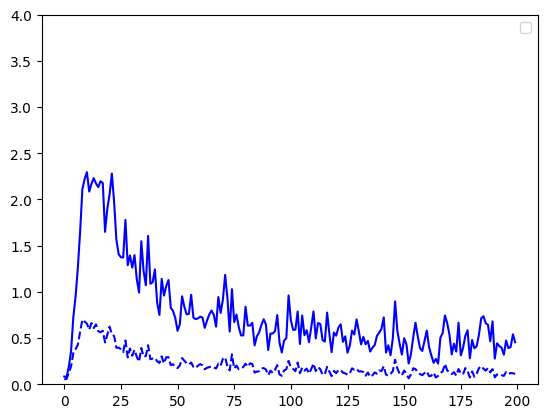

In [11]:
plt.plot(out['ForwardKL'].mean(0), color='blue', linestyle='--')
plt.plot(out['BackwardKL'].mean(0), color='blue')
plt.legend()
plt.ylim([0,4.0])

/tmp/ipykernel_1338073/3121903713.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(0.0, 4.0)

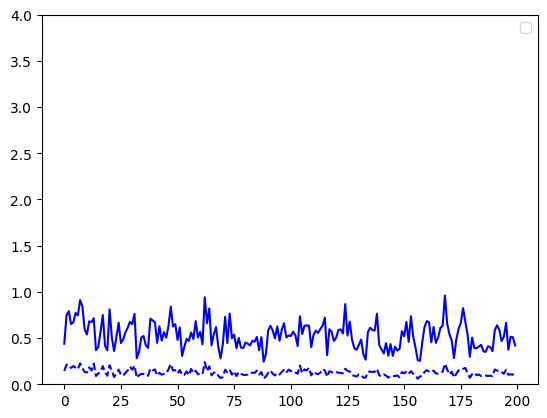

In [8]:
plt.plot(out['ForwardKL'].mean(0), color='blue', linestyle='--')
plt.plot(out['BackwardKL'].mean(0), color='blue')
plt.legend()
plt.ylim([0,4.0])

/tmp/ipykernel_1338073/3121903713.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(0.0, 4.0)

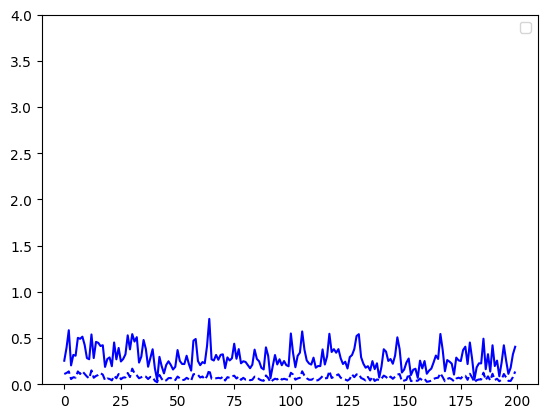

In [5]:
plt.plot(out['ForwardKL'].mean(0), color='blue', linestyle='--')
plt.plot(out['BackwardKL'].mean(0), color='blue')
plt.legend()
plt.ylim([0,4.0])

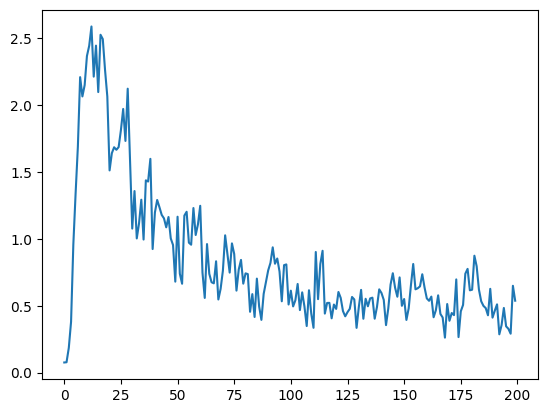

In [8]:
plt.plot(out['BackwardKL'].mean(0))

In [ ]:
N_SEQS = 50

hmms = torch.randperm(len(dataset))[:N_SEQS];
batch = dataset.__getitems__(hmms, length=50);

/home/mila/l/leo.gagnon/latent_control/data/hmm.py:595: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  intv_envs = jnp.array(intv_envs)


In [13]:
implicit_task = MetaLearningTask.load_from_checkpoint(
    "/network/scratch/l/leo.gagnon/latent_control_log/checkpoints/5yh58ivo/last.ckpt", strict=False
).cuda()#jfvx3yww, v7l0nll0

# Compute the implicit posterior predictive
implicit_pred = torch.nn.functional.softmax(
    implicit_task.model(batch['input_ids']), dim=-1
).cpu().detach()


In [14]:
mc_out = task.evaluate_mc_estimate(
    cond_input_ids=batch['input_ids'],
    n_samples=5,
    max_seqs=N_SEQS,
    full_metrics=True,
    implicit_pred=implicit_pred
    )

100%|██████████| 50/50 [02:01<00:00,  2.43s/it]


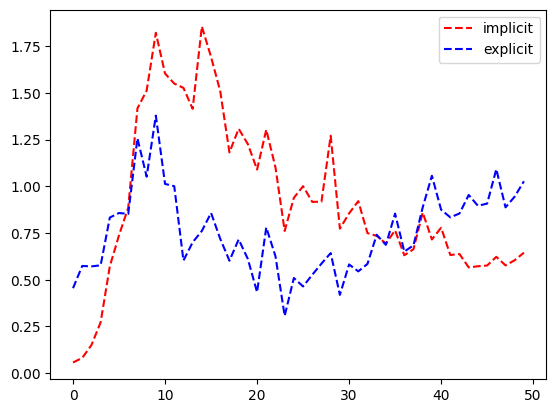

In [15]:
plt.plot(mc_out['jensen_div_implicit'].mean(0), label='implicit', color='red', linestyle='--')
plt.plot(mc_out['jensen_div'].mean(0), label='explicit', color='blue', linestyle='--')
plt.legend()

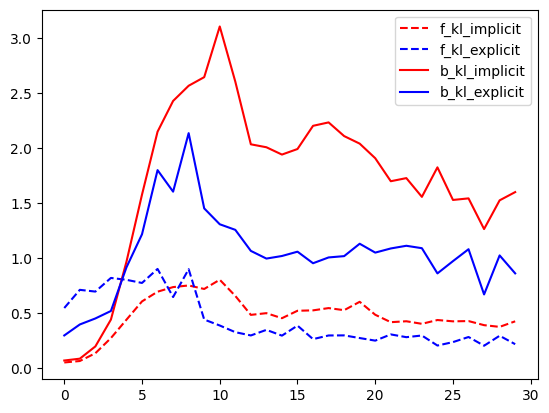

In [7]:
plt.plot(mc_out['f_kl_implicit'].mean(0), label='f_kl_implicit', color='red', linestyle='--')
plt.plot(mc_out['f_kl'].mean(0), label='f_kl_explicit', color='blue', linestyle='--')
plt.plot(mc_out['b_kl_implicit'].mean(0), label='b_kl_implicit', color='red')
plt.plot(mc_out['b_kl'].mean(0), label='b_kl_explicit', color='blue')
plt.legend()

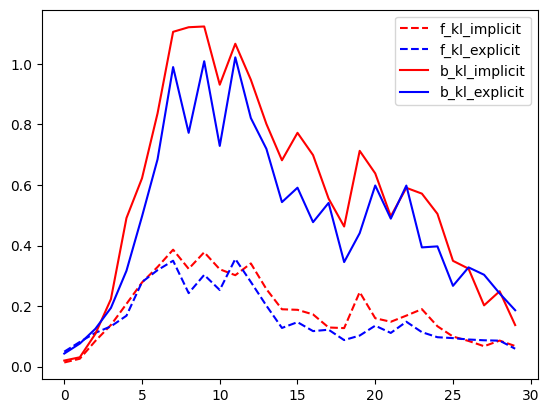

In [20]:
plt.plot(mc_out['f_kl_implicit'].mean(0), label='f_kl_implicit', color='red', linestyle='--')
plt.plot(mc_out['f_kl'].mean(0), label='f_kl_explicit', color='blue', linestyle='--')
plt.plot(mc_out['b_kl_implicit'].mean(0), label='b_kl_implicit', color='red')
plt.plot(mc_out['b_kl'].mean(0), label='b_kl_explicit', color='blue')
plt.legend()

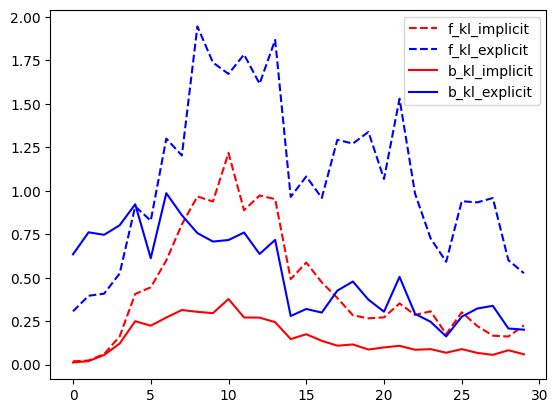

In [17]:
plt.plot(mc_out['f_kl_implicit'].mean(0), label='f_kl_implicit', color='red', linestyle='--')
plt.plot(mc_out['f_kl'].mean(0), label='f_kl_explicit', color='blue', linestyle='--')
plt.plot(mc_out['b_kl_implicit'].mean(0), label='b_kl_implicit', color='red')
plt.plot(mc_out['b_kl'].mean(0), label='b_kl_explicit', color='blue')
plt.legend()

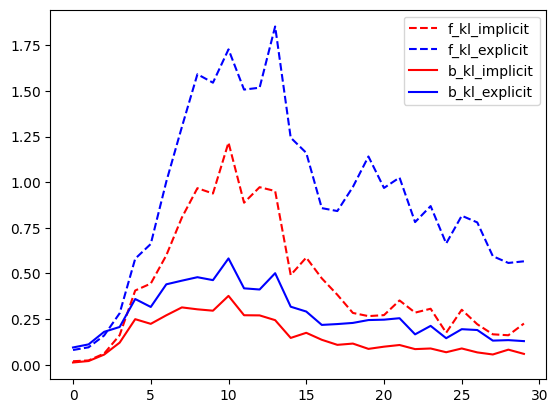

In [15]:
plt.plot(mc_out['f_kl_implicit'].mean(0), label='f_kl_implicit', color='red', linestyle='--')
plt.plot(mc_out['f_kl'].mean(0), label='f_kl_explicit', color='blue', linestyle='--')
plt.plot(mc_out['b_kl_implicit'].mean(0), label='b_kl_implicit', color='red')
plt.plot(mc_out['b_kl'].mean(0), label='b_kl_explicit', color='blue')
plt.legend()